In [1]:
# Importing Libraries 
import pandas as pd
import warnings
import numpy as np

#Data Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import graphviz

### training model libraries
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy


# Classifier libraries
from sklearn.svm import SVC
from sklearn import metrics
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

In [24]:
warnings.filterwarnings("ignore")
loan_df = pd.read_csv('Resources/LoanApprovalPrediction.csv')
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


In [25]:
# Summary of numerical variables for training data set
loan_df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,586.000000,598.000000,598.000000,577.000000,584.000000,549.000000
mean,0.755973,5292.252508,1631.499866,144.968804,341.917808,0.843352
std,1.007751,5807.265364,2953.315785,82.704182,65.205994,0.363800
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,0.000000,3806.000000,1211.500000,127.000000,360.000000,1.000000
75%,1.750000,5746.000000,2324.000000,167.000000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,650.000000,480.000000,1.000000


 Data Analysis:
There are total 13 columns including target variable(loan status), all of them are self explanatory.

Missing values for the columns: 

Dependents,
loan amount,
loan amount,
Credit_history term 

drop null values for missing values for categorical and numerical columns


Numerical and Categorical values assigned to columns

In [26]:
#loan_df=loan_df.dropna()
loan_df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [27]:
############ Count number of Categorical and Numerical Columns ######################
loan_df = loan_df.drop(columns=['Loan_ID']) ## Dropping Loan ID
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']


print(categorical_columns)
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
print(numerical_columns)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History', 'Loan_Amount_Term']
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


In [28]:
# Get the unique values and their frequency of variable Property_Area
loan_df['Property_Area'].value_counts()

Semiurban    225
Urban        198
Rural        175
Name: Property_Area, dtype: int64

### Preprocessing Data:

Encoding Categorical Features.

In [29]:
# Encoding categrical Features:
loan_df_encoded = pd.get_dummies(loan_df,drop_first=True)
loan_df_encoded.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,0.0,5849,0.0,NaN,360.0,1.0,1,0,0,0,0,1,1
1,1.0,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0,0
2,0.0,3000,0.0,66.0,360.0,1.0,1,1,0,1,0,1,1
3,0.0,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,1,1
4,0.0,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,1,1


In [48]:
########## Split Features and Target Varible ############
#X = loan_df_encoded.drop(columns=['Loan_Status_Y','Education_Not Graduate', 'Property_Area_Semiurban','Property_Area_Urban','Loan_Amount_Term'])
X = loan_df_encoded.drop(columns=['Loan_Status_Y','Credit_History','ApplicantIncome'])
print(X)
y = loan_df_encoded['Loan_Status_Y']
################# Splitting into Train -Test Data #######
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify =y,random_state =100)
############### Handling/Imputing Missing values #############
imp = SimpleImputer(strategy='mean')
imp_train = imp.fit(X_train)
X_train = imp_train.transform(X_train)
X_test_imp = imp_train.transform(X_test)

     Dependents  CoapplicantIncome  LoanAmount  Loan_Amount_Term  Gender_Male  \
0           0.0                0.0         NaN             360.0            1   
1           1.0             1508.0       128.0             360.0            1   
2           0.0                0.0        66.0             360.0            1   
3           0.0             2358.0       120.0             360.0            1   
4           0.0                0.0       141.0             360.0            1   
..          ...                ...         ...               ...          ...   
593         0.0                0.0        71.0             360.0            0   
594         3.0                0.0        40.0             180.0            1   
595         1.0              240.0       253.0             360.0            1   
596         2.0                0.0       187.0             360.0            1   
597         0.0                0.0       133.0             360.0            0   

     Married_Yes  Education

### Model 1: K-Nearest Neighbour (KNN) 

KNN best accuracy: 70.83%


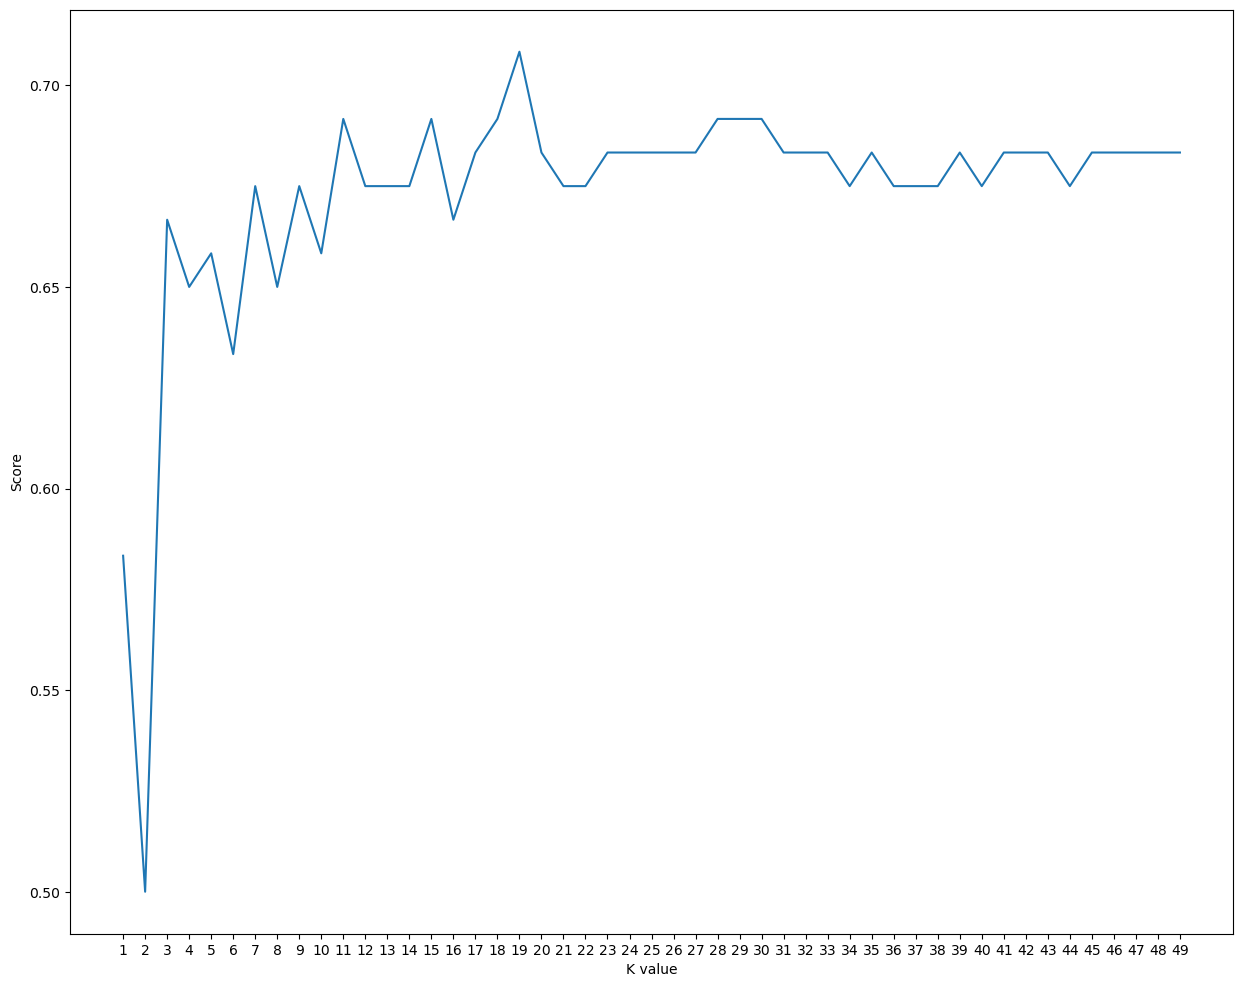

In [49]:
knn_score = []
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    knn_score.append(knn.score(X_test_imp, y_test))
    
print("KNN best accuracy: {:.2f}%".format(max(knn_score)*100))
plt.figure(figsize=(15,12))
plt.plot(range(1,50), knn_score)
plt.xticks(np.arange(1,50,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()


### Model 2: Support Vector Machine (SVM)

In [15]:
svc = SVC(kernel='rbf', max_iter = 1000)
svc.fit(X_train, y_train)
y_predict = svc.predict(X_test_imp)

print('SVC Accuracy: {:.2f}%'.format(accuracy_score(y_predict,y_test)*100))
print(y_test)

print("Classification Report:")
print("******************************************************************")
print(classification_report(y_test, y_predict))
print("******************************************************************")

print("Confusion Matrix")
print("******************************************************************")
print(confusion_matrix(y_test, y_predict))
print("******************************************************************")


SVC Accuracy: 70.30%
69     1
582    1
175    0
24     1
400    0
      ..
503    1
425    1
446    1
171    1
202    1
Name: Loan_Status_Y, Length: 101, dtype: uint8
Classification Report:
******************************************************************
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.70      1.00      0.83        71

    accuracy                           0.70       101
   macro avg       0.35      0.50      0.41       101
weighted avg       0.49      0.70      0.58       101

******************************************************************
Confusion Matrix
******************************************************************
[[ 0 30]
 [ 0 71]]
******************************************************************


<Axes: >

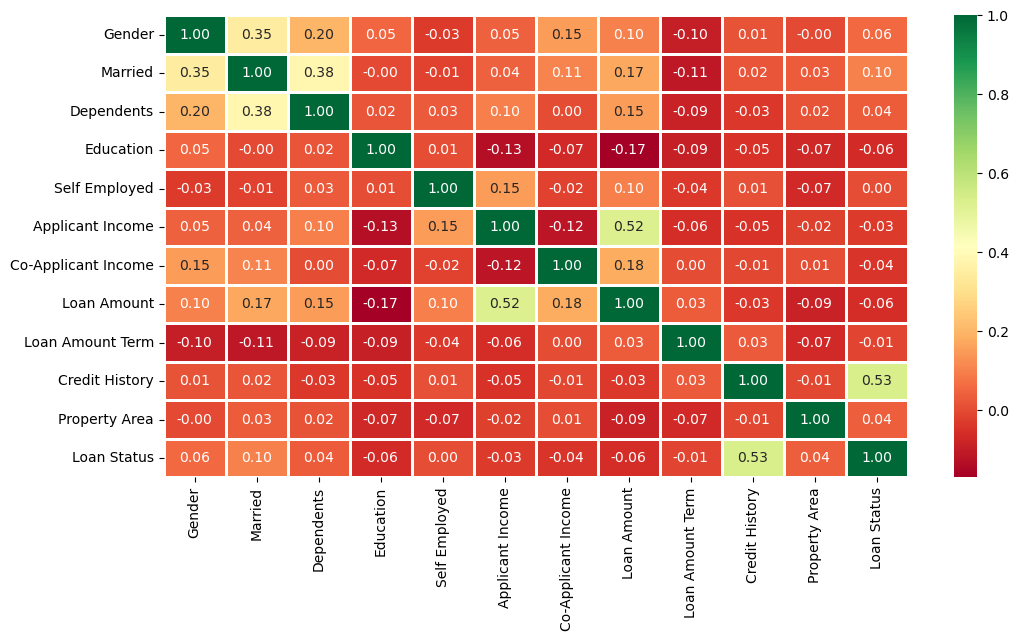

In [53]:

copy_loan_df = loan_df

copy_loan_df.rename(columns= {'Self_Employed': 'Self Employed', 'ApplicantIncome':'Applicant Income', 
                              'CoapplicantIncome': 'Co-Applicant Income', 'LoanAmount': 'Loan Amount', 
                              'Loan_Amount_Term':'Loan Amount Term', 'Credit_History': 'Credit History', 
                              'Property_Area': 'Property Area', 'Loan_Status': 'Loan Status'}, inplace=True)


label_encoder = preprocessing.LabelEncoder()
obj = (copy_loan_df.dtypes == 'object')
for col in list(obj[obj].index):
    copy_loan_df[col] = label_encoder.fit_transform(copy_loan_df[col])
plt.figure(figsize=(12,6))
sns.heatmap(copy_loan_df.corr(), cmap='RdYlGn', fmt='.2f', linewidths=2, annot=True)